### Telecom churn prediction:
**Faseela K Karim**

In [60]:
#import the required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report,ConfusionMatrixDisplay



### **Introduction**
Logistic regression is a statistical method used to analyze a dataset with a binary outcome variable, often referred to as the dependent variable. The aim of logistic regression is to estimate the probability of the binary outcome based on one or more predictor variables, also known as independent variables. The logistic regression model estimates the relationship between the dependent variable and independent variables by fitting a sigmoidal curve to the data. The sigmoidal curve allows the model to predict the probability of an event, which can then be used to make predictions about the binary outcome.

Logistic regression can be used for various purposes such as predicting customer churn.Logistic regression requires a binary outcome variable and predictor variables that are either continuous or categorical. Categorical variables are often encoded using one-hot encoding, where each unique category is converted into a binary variable. This allows the logistic regression model to handle categorical variables and estimate the impact of each category on the binary outcome.

In this context, it is important to note that logistic regression is a form of supervised learning, where the model is trained on a labeled dataset to make predictions about new, unlabeled data. Overall, logistic regression is a powerful tool for analyzing binary outcomes and has a wide range of applications in various fields

## Table of Contents
1. [Logistic Regression Model 0](#model0)
2. [Logistic Regression Model 1](#model1)
3. [Logistic Regression Model 2](#model2)
4. [Logistic Regression Model 3](#model3)
5. [Hyper parameter optimization using grid search](#grid)
6. [Final logistic regression model](#final)
7. [Evaluation of the Final model](#eval)
8. [Conclusion](#conclusion)




In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_train=pd.read_csv('/content/drive/My Drive/final_capstone/train_data_vif_out.csv',index_col=0)
# df_test=pd.read_csv('/content/drive/My Drive/final_capstone/test_data_vif_out.csv',index_col=0)

In [61]:
df_train=pd.read_csv('data/train_data_vif_out.csv',index_col=0)
df_test=pd.read_csv('data/test_data_vif_out.csv',index_col=0)

In [62]:
#seperating target variables and other features into X and Y variables seperately for test and train data
X_train=df_train.drop('churn',axis=1)
y_train=df_train.churn
X_test=df_test.drop('churn',axis=1)
y_test=df_test.churn


In [ ]:
#scale the data using standard scaler
scaler=StandardScaler()
#fit and transform train data
X_train_scaled=scaler.fit_transform(X_train)
#transform the test data
X_test_scaled=scaler.transform(X_test)

#### **Logistic Regression Model 0**<a name="model0"></a>

The below given code is performing logistic regression analysis using statsmodels package. First, a constant term is added to the training and testing sets of the independent variables using the add_constant() function. Then, a new DataFrame is created with the original column names of the independent variables. Next, the logistic regression model is instantiated using the Logit() function and is fit using the fit() function. The summary() function is used to display the results of the logistic regression analysis, which include the coefficient estimates, standard errors, p-values, and other statistical information for each independent variable in the model.

In [63]:
# !! Add constant to our X_test_scaled and X-trained_scaled !!
X_train_const_0 = sm.add_constant(X_train_scaled)
X_test_const_0 = sm.add_constant(X_test_scaled)


In [64]:

# Create a new DataFrame with the original column names
X_train_const_named = pd.DataFrame(X_train_const_0, columns=["const"] + list(X_train.columns))

# Instantiate the logistic regression model with the new DataFrame
logreg_0_named = sm.Logit(y_train, X_train_const_named)

# Fit the model (this returns a separate object with the parameters)
logreg_results_0_named = logreg_0_named.fit()

# Display the results 
print(logreg_results_0_named.summary())


Optimization terminated successfully.
         Current function value: 0.673439
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                75000
Model:                          Logit   Df Residuals:                    74919
Method:                           MLE   Df Model:                           80
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.02838
Time:                        16:47:58   Log-Likelihood:                -50508.
converged:                       True   LL-Null:                       -51983.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0191      0.007     -2.560      0.010      -0.034      -0.004
totmr

The below code gets the model predictions as probabilities and saves them to y_proba_0. Then, it sets the threshold to 0.5 and converts soft predictions (probabilities) to hard predictions (0 and 1) using np.where(). Next, it calculates the accuracy by evaluating the two arrays to find where the predicted value matches the actual churn value and divides by the total number of predictions. Finally, it prints the accuracy score.

In [ ]:
# Getting the model predictions as probabilities and saving to 'y_proba'
y_proba_0 = logreg_results_0_named.predict(X_train_const_0)

In [ ]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
# We will set our threshold to 0.5 
y_pred_0 = np.where(y_proba_0 >= 0.5, 1, 0)



In [ ]:
# Calculating accuracy - Evaluate the two arrays to find where predicted = true chuurn
# Then divide by the number of predictions/number of customers
acc_0 = (y_pred_0 == y_train).mean()

# Print the accuracy score
print(f'Model accuracy = {acc_0}')

Model accuracy = 0.5832266666666667


Lets try to find the prediction accuracy for different threshold values.The below given code is creating a list of accuracy scores for different decision thresholds. The threshold_list contains the different decision thresholds to be evaluated, and for each threshold, the code calculates the accuracy score .The accuracy scores for each threshold are saved in a DataFrame named accuracy_df_0 with the columns 'Decision Threshold' and 'Accuracy'.

In [ ]:
accuracy_list = []
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_pred_0 = np.where(y_proba_0 >= threshold, 1, 0)

    # Calculating accuracy 
    acc = 100*(y_pred_0 == y_train).mean()

    # Add the accuracy to our dictionary
    accuracy_list.append(acc)

accuracy_df_0 = pd.DataFrame(index=range(len(threshold_list)), 
                           data=zip(threshold_list, accuracy_list), 
                           columns=['Decision Threshold', 'Accuracy'])


Plot the prediction accuracy for different threshold values

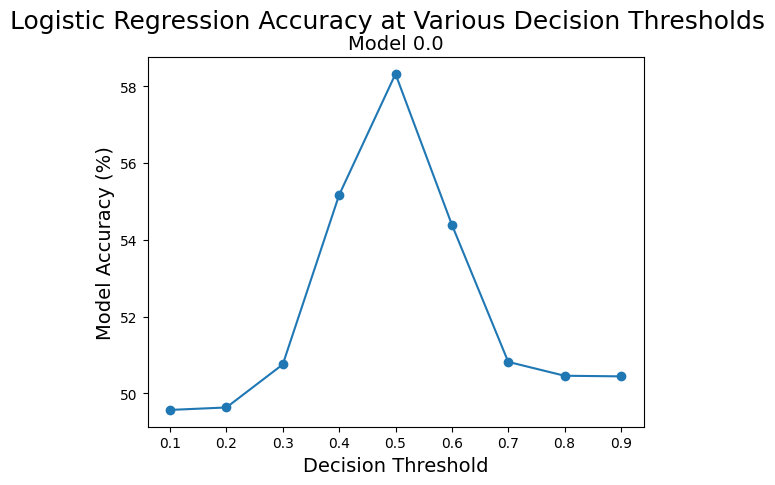

In [ ]:
plt.figure()
plt.plot(accuracy_df_0['Decision Threshold'], accuracy_df_0['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Various Decision Thresholds', size=18)
plt.title('Model 0.0', size=14)
plt.xlabel('Decision Threshold', size=14)
plt.ylabel('Model Accuracy (%)', size=14)
plt.yticks()
plt.show()

From the above graph we can see that the prediction accuracy of train data is maximum at 0.5 threshold. 

**Make prediction for the test dataset**

In [ ]:
# Make predictions on the test set
y_pred_0 = logreg_results_0_named.predict(X_test_const_0)

# Since the predictions are probabilities, you need to convert them to class labels (0 or 1)
y_pred_labels_0 = np.round(y_pred_0)

# Calculate the accuracy
accuracy_0 = accuracy_score(y_test, y_pred_labels_0)
print(f"Accuracy: {accuracy_0}")

Accuracy: 0.58076


### **Drop the columns based on p value**

In logistic regression, p-value is a statistical measure used to determine the significance of each feature or independent variable in predicting the dependent variable or target class. A p-value less than the pre-defined significance level (usually 0.05) indicates that the feature is statistically significant in predicting the target class.

Therefore, we need to drop variables based on p-value because including insignificant variables in the model can lead to overfitting, reducing the model's accuracy and interpretability. A variable with a high p-value indicates that it is not significantly associated with the target class and including it in the model can lead to inaccurate predictions. By dropping such variables, we can build a more efficient and accurate model.

The p-value is also used to test the null hypothesis, which assumes that there is no significant relationship between the independent variable and the dependent variable. If the p-value is less than the significance level, the null hypothesis is rejected, indicating that there is a significant relationship between the independent variable and the dependent variable.

In summary, p-value is an important statistical measure in logistic regression, and it helps us to determine the significance of each variable in predicting the target class. Dropping variables based on p-value can improve the accuracy and interpretability of the model.

In [ ]:
#dwllsize_J has highest p_value ,so drop that column from train data
X_train_1=X_train.drop('dwllsize_J',axis=1) 


In [ ]:
#dwllsize_J has highest p_value ,so drop that column from test data
X_test_1=X_test.drop('dwllsize_J',axis=1) 

In [ ]:
#scale the test and train data again after dropping the column
scaler=StandardScaler()
X_train_1_scaled=scaler.fit_transform(X_train_1)
X_test_1_scaled=scaler.transform(X_test_1)

#### **Logistic Regression Model 1**<a name="model1"></a>

Logistic regression model for new dataframe after deleting columns based on p-value.

In [ ]:
# !! Add constant to our X_train_1_scaled and X_test_1_scaled !!
X_train_const_1 = sm.add_constant(X_train_1_scaled)
X_test_const_1 = sm.add_constant(X_test_1_scaled)


In [ ]:

# Create a new DataFrame with the original column names
X_train_const_named = pd.DataFrame(X_train_const_1, columns=["const"] + list(X_train_1.columns))

# Instantiate the logistic regression model with the new DataFrame
logreg_1_named = sm.Logit(y_train, X_train_const_named)

# Fit the model (this returns a separate object with the parameters)
logreg_results_1_named = logreg_1_named.fit()

# Display the results 
print(logreg_results_1_named.summary())

Optimization terminated successfully.
         Current function value: 0.673441
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                75000
Model:                          Logit   Df Residuals:                    74920
Method:                           MLE   Df Model:                           79
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.02838
Time:                        14:07:57   Log-Likelihood:                -50508.
converged:                       True   LL-Null:                       -51983.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0191      0.007     -2.560      0.010      -0.034      -0.004
totmr

In [ ]:
# Getting the model predictions as probabilities and saving to 'y_proba'
y_proba_1 = logreg_results_1_named.predict(X_train_const_1)

In [ ]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
# We will set our threshold to 0.5 
y_pred_1 = np.where(y_proba_1 >= 0.5, 1, 0)



In [ ]:
# Calculating accuracy - Evaluate the two arrays to find where predicted = true chuurn
# Then divide by the number of predictions/number of customers
acc_1 = (y_pred_1 == y_train).mean()

# Print the accuracy score
print(f'Model accuracy = {acc_1}')

Model accuracy = 0.5831466666666667


In [ ]:
# Make predictions on the test set
y_pred_1 = logreg_results_1_named.predict(X_test_const_1)

# Since the predictions are probabilities, we need to convert them to class labels (0 or 1)
y_pred_labels_1 = np.round(y_pred_1)

# Calculate the accuracy
accuracy_1 = accuracy_score(y_test, y_pred_labels_1)
print(f"Accuracy: {accuracy_1}")

Accuracy: 0.58028


In [ ]:
#Based on p-value we can delete below given columns
columns_delete_pvalue=['peak_dat_Mean','mou_opkd_Mean','hnd_webcap','truck','HHstatin_B','dwllsize_E',
                       'dwllsize_F' ,'dwllsize_G' ,'dwllsize_H' ,'dwllsize_I' ,'dwllsize_K',"dwllsize_L",'dwllsize_N','dwllsize_M' ]

In [ ]:
#drop the columns with high p-value from the dataset
X_train_1=X_train_1.drop(columns=columns_delete_pvalue,axis=1) 


In [ ]:
#drop the columns with high p-value from the test dataset
X_test_1=X_test_1.drop(columns=columns_delete_pvalue,axis=1) 

In [ ]:
#scale the data again after dropping columns based on p-value
scaler=StandardScaler()
X_train_2_scaled=scaler.fit_transform(X_train_1)
X_test_2_scaled=scaler.transform(X_test_1)

#### **Logistic Regression Model 2**<a name="model2"></a>

Logistic regression model for new dataframe after deleting columns based on p-value.

In [ ]:
# !! Add constant to our X_train_1_scaled,X_test_1_scaled !!
X_train_const_2 = sm.add_constant(X_train_2_scaled)
X_test_const_2 = sm.add_constant(X_test_2_scaled)


In [ ]:
# Create a new DataFrame with the original column names
X_train_const_named = pd.DataFrame(X_train_const_2, columns=["const"] + list(X_train_1.columns))

# Instantiate the logistic regression model with the new DataFrame
logreg_2_named = sm.Logit(y_train, X_train_const_named)

# Fit the model (this returns a separate object with the parameters)
logreg_results_2_named = logreg_2_named.fit()

# Display the results 
print(logreg_results_2_named.summary())

Optimization terminated successfully.
         Current function value: 0.673540
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                75000
Model:                          Logit   Df Residuals:                    74934
Method:                           MLE   Df Model:                           65
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.02823
Time:                        14:24:09   Log-Likelihood:                -50516.
converged:                       True   LL-Null:                       -51983.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0191      0.007     -2.562      0.010      -0.034      -0.004
totmr

In [ ]:
# Getting the model predictions as probabilities and saving to 'y_proba'
y_proba_2 = logreg_results_2_named.predict(X_train_const_2)

In [ ]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
# We will set our threshold to 0.5 
y_pred_2 = np.where(y_proba_2 >= 0.5, 1, 0)



In [ ]:
# Calculating accuracy - Evaluate the two arrays to find where predicted = true survival
# Then divide by the number of predictions/passengers
acc_2 = (y_pred_2 == y_train).mean()

# Print the accuracy score
print(f'Model accuracy = {acc_2}')

Model accuracy = 0.5830266666666667


In [ ]:
# Make predictions on the test set
y_pred_2 = logreg_results_2_named.predict(X_test_const_2)

# Since the predictions are probabilities, you need to convert them to class labels (0 or 1)
y_pred_labels_2 = np.round(y_pred_2)

# Calculate the accuracy
accuracy_2 = accuracy_score(y_test, y_pred_labels_2)
print(f"Accuracy: {accuracy_2}")

Accuracy: 0.57928


In [ ]:
#Based on p-value we can delete below given columns
columns_delete_pvalue_1=['dwllsize_C','HHstatin_G','datovr_Mean',"da_Mean",'adults','income','new_cell_N','crclscod_C','prizm_social_one_S',
                               'area_Rural','area_Urban','HHstatin_A','HHstatin_C','prizm_social_one_C','dwllsize_B','dwllsize_D','dwllsize_O',
                         'ethnic_F','ethnic_G','ethnic_M','ethnic_S','ethnic_M','ethnic_X']

In [ ]:
#delete the columns from the dataframe
X_train_1=X_train_1.drop(columns=columns_delete_pvalue_1,axis=1) 


In [ ]:
#delete the columns with high p-value from test data
X_test_1=X_test_1.drop(columns=columns_delete_pvalue_1,axis=1) 

In [ ]:
#scale test and train data
scaler=StandardScaler()
X_train_3_scaled=scaler.fit_transform(X_train_1)
X_test_3_scaled=scaler.transform(X_test_1)

#### **Logistic Regression Model 3**<a name="model3"></a>

Logistic regression model for new dataframe after deleting columns based on p-value.

In [ ]:
# !! Add constant to our X !!
X_train_const_3 = sm.add_constant(X_train_3_scaled)
X_test_const_3 = sm.add_constant(X_test_3_scaled)


In [ ]:

# Create a new DataFrame with the original column names
X_train_const_named = pd.DataFrame(X_train_const_3, columns=["const"] + list(X_train_1.columns))

# Instantiate the logistic regression model with the new DataFrame
logreg_3_named = sm.Logit(y_train, X_train_const_named)

# Fit the model (this returns a separate object with the parameters)
logreg_results_3_named = logreg_3_named.fit()

# Display the results 
print(logreg_results_3_named.summary())

Optimization terminated successfully.
         Current function value: 0.673781
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                75000
Model:                          Logit   Df Residuals:                    74956
Method:                           MLE   Df Model:                           43
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.02789
Time:                        14:32:31   Log-Likelihood:                -50534.
converged:                       True   LL-Null:                       -51983.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0191      0.007     -2.560      0.010      -0.034      -0.004
totmr

In [ ]:
# Getting the model predictions as probabilities and saving to 'y_proba'
y_proba_3 = logreg_results_3_named.predict(X_train_const_3)

In [ ]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
# We will set our threshold to 0.5 
y_pred_3 = np.where(y_proba_3 >= 0.5, 1, 0)



In [ ]:
# Calculating accuracy - Evaluate the two arrays to find where predicted = true survival
# Then divide by the number of predictions/passengers
acc_3 = (y_pred_3 == y_train).mean()

# Print the accuracy score
print(f'Model accuracy = {acc_3}')

Model accuracy = 0.5819333333333333


Find accuracy for different threshold

In [ ]:
accuracy_list = []
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_pred_3 = np.where(y_proba_3 >= threshold, 1, 0)

    # Calculating accuracy 
    acc = 100*(y_pred_3 == y_train).mean()

    # Add the accuracy to our dictionary
    accuracy_list.append(acc)

accuracy_df = pd.DataFrame(index=range(len(threshold_list)), 
                           data=zip(threshold_list, accuracy_list), 
                           columns=['Decision Threshold', 'Accuracy'])


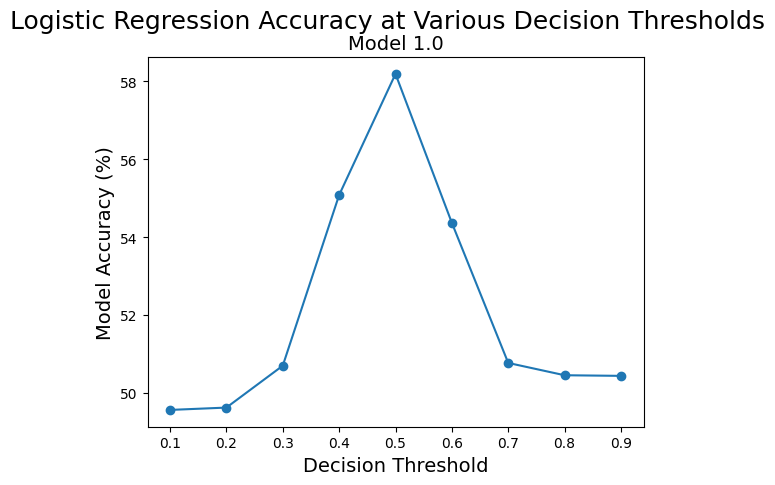

In [ ]:
#plot different threshold and their accuracy
plt.figure()
plt.plot(accuracy_df['Decision Threshold'], accuracy_df['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Various Decision Thresholds', size=18)
plt.title('Model 1.0', size=14)
plt.xlabel('Decision Threshold', size=14)
plt.ylabel('Model Accuracy (%)', size=14)
plt.yticks()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_3 = logreg_results_3_named.predict(X_test_const_3)

# Since the predictions are probabilities, you need to convert them to class labels (0 or 1)
y_pred_labels_3 = np.round(y_pred_3)

# Calculate the accuracy
accuracy_3 = accuracy_score(y_test, y_pred_labels_3)
print(f"Accuracy: {accuracy_3}")

Accuracy: 0.57828


Shape of test dataframe and train dataframe after deleting columns with high p value

In [ ]:
X_train_1.shape

(75000, 43)

In [ ]:
X_test_1.shape

(25000, 43)

In [ ]:
df_train_log=pd.concat([X_train_1,y_train],axis=1)
df_test_log=pd.concat([X_test_1,y_test],axis=1)

In [ ]:
df_train_log.shape

(75000, 44)

In [ ]:
df_test_log.shape

(25000, 44)

In [ ]:
#save this dataframe
df_train_log.to_csv('train_logistic_regression_output.csv')
df_test_log.to_csv('test_logistic_regression_output.csv')

### **Hyper parameter optimization using grid search**<a name="grid"></a>

Hyperparameter optimization for logistic regression involves tuning the parameters that are not learned during the model training process. These parameters are set prior to the model training and can significantly impact the performance of the model. In logistic regression, hyperparameters such as regularization strength, penalty, solver, and max iterations can be tuned to improve model performance.

Hyperparameter optimization involves exploring different values of these hyperparameters and selecting the best set of hyperparameters that maximize the model's performance on a validation set. This can be done using techniques such as grid search or randomized search.

Grid search involves defining a grid of hyperparameter values and training and evaluating the model for each combination of hyperparameters.

Hyperparameter optimization can significantly improve the performance of logistic regression models and should be a crucial step in the model-building process.

The below given code is performing hyperparameter tuning for a logistic regression model using GridSearchCV. It is creating a pipeline with three steps - normalization, standardization, and logistic regression, and tuning the hyperparameters of the logistic regression model using the specified parameter grid. The best model is then fit to the training data using 5-fold cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

estimators = [('normalize', MinMaxScaler()),
              ('standardize', StandardScaler()),
               ('model', LogisticRegression())]
pipe = Pipeline(estimators)

param_grid =     { 
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['lbfgs', 'liblinear','saga'],
        'model__max_iter':[1000]
    }
     
grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train_1, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

In [ ]:
#best estimator to predict the target variable for the test dataset.
fittedgrid.best_estimator_

Pipeline(steps=[('normalize', MinMaxScaler()),
                ('standardize', StandardScaler()),
                ('model', LogisticRegression(C=0.1, max_iter=1000))])

In [ ]:
#This will return a dictionary with the best parameters for the model.
fittedgrid.best_params_

{'model__C': 0.1,
 'model__max_iter': 1000,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

### **Final logistic regression model**<a name="final"></a>

Based on the parameter obtained from grid search created a new model. The below code is training a logistic regression model on the training set using the fit method. The hyperparameters used for the model are specified in the initialization of my_logreg1. After training the model, the score method is used to calculate the accuracy of the model on the training set. This accuracy score indicates how well the model fits the training data.

In [ ]:
my_logreg1 = LogisticRegression(random_state=1,C=.1,solver='lbfgs',penalty='l2',max_iter=1000)
my_logreg1.fit(X_train_3_scaled,y_train)
    
# train on traning set
my_logreg1.score(X_train_3_scaled,y_train)


0.5818933333333334

In [ ]:
#returns the mean accuracy on the given test data
my_logreg1.score(X_test_3_scaled,y_test)

0.57824

### **Evaluation of the Final model**<a name="eval"></a>

Evaluating the performance of a logistic regression model is crucial to determine its effectiveness in predicting the target variable. There are various evaluation methods for logistic regression models, such as the F1 score, ROC curve, precision, recall, confusion matrix, and classification report. These methods help in assessing the accuracy, precision, and recall of the model, as well as identifying false positives and false negatives. By using these evaluation methods, we can understand the strengths and weaknesses of the model and take appropriate steps to improve its performance.

In [ ]:
# Make predictions on the test set
y_pred = my_logreg1.predict(X_test_3_scaled)
y_pred_proba = my_logreg1.predict_proba(X_test_3_scaled)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.58
Precision: 0.57
Recall: 0.58
F1-score: 0.57
AUC-ROC: 0.61


The values suggest that the model is not performing well in predicting customer churn. The accuracy of 0.58 indicates that the model correctly predicted 58% of the customer churn cases, while the remaining 42% of the predictions were incorrect. The precision of 0.57 suggests that among the predicted positive cases (i.e., customers predicted to churn), 57% of them were actually churned customers. The recall of 0.58 suggests that the model was able to identify only 58% of the actual churned customers. The F1-score of 0.57 is the harmonic mean of precision and recall and is a measure of the overall accuracy of the model. The AUC-ROC value of 0.61 suggests that the model has a slightly better performance than a random guess, but still not satisfactory for predicting customer churn accurately. Overall, these values indicate that the model needs further refinement and improvement to achieve better accuracy in predicting customer churn in the telecom sector.


Confusion Matrix:
[[7325 5284]
 [5260 7131]]


,Predicted churn,Predicted not churn
True churn,7325,5284
True not churn,5260,7131



Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     12609
           1       0.57      0.58      0.57     12391

    accuracy                           0.58     25000
   macro avg       0.58      0.58      0.58     25000
weighted avg       0.58      0.58      0.58     25000



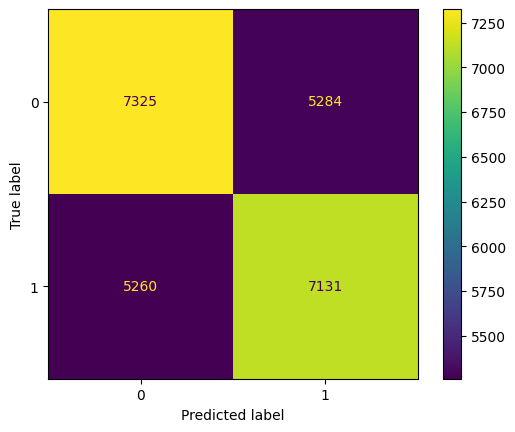

In [ ]:
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cf_matrix=confusion_matrix(y_test, y_pred)
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted churn", "Predicted not churn"],
    index=["True churn", "True not churn"]
)

display(cf_df)
ConfusionMatrixDisplay.from_estimator(my_logreg1, X_test_3_scaled, y_test);


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



The confusion matrix shows the number of correct and incorrect predictions made by the model on the test set. In this case, there were 7325 true positive predictions, 7131 true negative predictions, 5284 false negative predictions, and 5260 false positive predictions. The classification report shows precision, recall, and f1-score values for both classes (churn and not churn). Precision represents the proportion of true positives out of all predicted positives, recall represents the proportion of true positives out of all actual positives, and f1-score is the harmonic mean of precision and recall. The macro average and weighted average are calculated to give an overall performance of the model. The accuracy value shows the overall accuracy of the model on the test set. In this case, the model has an accuracy of 0.58, which means that it correctly predicted 58% of the cases in the test set.

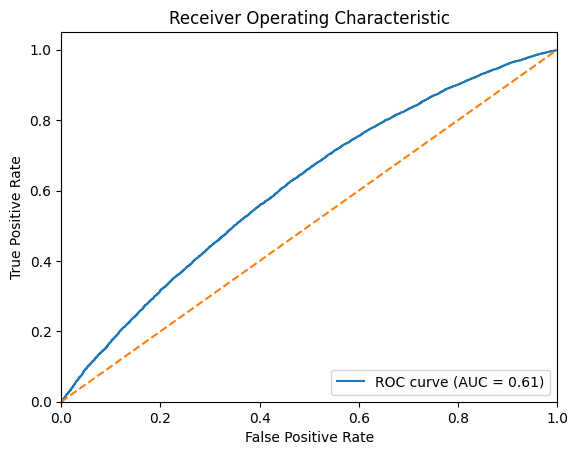

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

The AUC-ROC value of 0.61 indicates that the logistic regression model has a fair ability to distinguish between positive and negative cases. AUC-ROC value ranges from 0 to 1, where 0.5 represents a random guess and 1 represents a perfect classifier. The value of 0.61 indicates that the model is better than random guessing but has limited discriminatory power. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity), and the AUC-ROC represents the area under this curve. 

### **Conclusion**<a name="conclusion"></a>

In conclusion, logistic regression is a powerful tool for customer churn prediction in the telecom sector.By using performance metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score, we can evaluate the effectiveness of the model and make improvements if necessary. In this particular case, the performance metrics is calculated to assess the accuracy of the model in predicting customer churn. Based on the evaluation metrics, the model has an accuracy of 0.58, indicating that it correctly predicts the churn status of 58% of the customers. The precision score of 0.57 suggests that out of all the customers predicted to churn, only 57% of them will actually churn. The recall score of 0.58 means that out of all the actual churned customers, only 58% of them are correctly identified by the model. The F1-score of 0.57 is the harmonic mean of precision and recall and provides a balanced evaluation of the model's performance. The AUC-ROC score of 0.61 indicates that the model has a moderate ability to distinguish between churned and non-churned customers. Overall, the model may benefit from further refinement to improve its performance.